In [1]:
from ModelTransfuser.ModelTransfuser import *
import matplotlib.pyplot as plt
import matplotlib.animation
import matplotlib.patches as patches
import seaborn as sns

import numpy as np
import torch

import os

%matplotlib inline

# Load data

In [2]:
# --- Load in training data ---
path_training = os.getcwd() + '/ModelTransfuser/data/chempy_TNG_train_data.npz'
training_data = np.load(path_training, mmap_mode='r')

elements = training_data['elements']
train_x = training_data['params']
train_y = training_data['abundances']


# ---  Load in the validation data ---
path_test = os.getcwd() + '/ModelTransfuser/data/chempy_TNG_val_data.npz'
val_data = np.load(path_test, mmap_mode='r')

val_x = val_data['params']
val_y = val_data['abundances']


# --- Clean the data ---
# Chempy sometimes returns zeros or infinite values, which need to removed
def clean_data(x, y):
    # Remove all zeros from the training data
    index = np.where((y == 0).all(axis=1))[0]
    x = np.delete(x, index, axis=0)
    y = np.delete(y, index, axis=0)

    # Remove all infinite values from the training data
    index = np.where(np.isfinite(y).all(axis=1))[0]
    x = x[index]
    y = y[index]

    # Remove H from Elements
    y = np.delete(y, 2, 1)

    return x, y


train_x, train_y = clean_data(train_x, train_y)
val_x, val_y     = clean_data(val_x, val_y)

# convert to torch tensors
train_x = torch.tensor(train_x, dtype=torch.float32)
train_y = torch.tensor(train_y, dtype=torch.float32)
val_x = torch.tensor(val_x, dtype=torch.float32)
val_y = torch.tensor(val_y, dtype=torch.float32)

train_data = torch.cat((train_x, train_y), 1)
val_data = torch.cat((val_x, val_y), 1)

## Define ModelTransfuser

In [3]:
# Define the ModelTransfuser

# Time steps for the diffusion process
T = 50
t = torch.linspace(0, 1, T)

model = ModelTransfuser(T, train_data.shape)

#model = model.load('ModelTransfuser/models/ModelTransfuser_t50_normed.pickle')

/export/home/bguenes/anaconda3/envs/simformer_torch/lib/python3.10/site-packages/torch/nn/modules/transformer.py:306: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [4]:
model.set_normalization(train_data)

Normalization parameters set.


In [5]:
model.train(train_data[:10000], epochs=10, device="cpu")

Epoch  1/10: 100%|██████████| 157/157 [00:06<00:00, 24.99it/s]


--- Training Loss: 5746451.000 ---



Epoch  2/10: 100%|██████████| 157/157 [00:04<00:00, 32.18it/s]


--- Training Loss: 1206226.750 ---



Epoch  3/10: 100%|██████████| 157/157 [00:04<00:00, 32.27it/s]


--- Training Loss: 1048005.188 ---



Epoch  4/10: 100%|██████████| 157/157 [00:04<00:00, 34.09it/s]


--- Training Loss:  954147.438 ---



Epoch  5/10: 100%|██████████| 157/157 [00:04<00:00, 33.06it/s]


--- Training Loss:  873816.062 ---



Epoch  6/10: 100%|██████████| 157/157 [00:04<00:00, 32.13it/s]


--- Training Loss:  842340.562 ---



Epoch  7/10: 100%|██████████| 157/157 [00:04<00:00, 32.14it/s]


--- Training Loss:  807878.750 ---



Epoch  8/10: 100%|██████████| 157/157 [00:04<00:00, 32.38it/s]


--- Training Loss:  772841.750 ---



Epoch  9/10: 100%|██████████| 157/157 [00:05<00:00, 31.31it/s]


--- Training Loss:  795940.438 ---



Epoch 10/10: 100%|██████████| 157/157 [00:05<00:00, 30.17it/s]

--- Training Loss:  761645.125 ---

Training finished after 0.9 minutes
Time 1: 0.03 s
Time 2: 0.14 s
Time 2a: 0.00 s
Time 3: 0.17 s
Time 4: 15.56 s
Time 5: 0.31 s
Time 6: 33.04 s


In [8]:
model.train(train_data[:10000], epochs=10, device="cuda:0")

Epoch  1/10:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch  1/10: 100%|██████████| 157/157 [00:03<00:00, 46.47it/s]


--- Training Loss:  751083.750 ---



Epoch  2/10: 100%|██████████| 157/157 [00:03<00:00, 41.07it/s]


--- Training Loss:  729657.625 ---



Epoch  3/10: 100%|██████████| 157/157 [00:03<00:00, 43.43it/s]


--- Training Loss:  721386.000 ---



Epoch  4/10: 100%|██████████| 157/157 [00:03<00:00, 49.00it/s]


--- Training Loss:  720746.062 ---



Epoch  5/10: 100%|██████████| 157/157 [00:02<00:00, 62.73it/s]


--- Training Loss:  722917.062 ---



Epoch  6/10: 100%|██████████| 157/157 [00:03<00:00, 45.78it/s]


--- Training Loss:  710446.062 ---



Epoch  7/10: 100%|██████████| 157/157 [00:03<00:00, 48.43it/s]


--- Training Loss:  683509.812 ---



Epoch  8/10: 100%|██████████| 157/157 [00:03<00:00, 52.11it/s]


--- Training Loss:  715949.188 ---



Epoch  9/10: 100%|██████████| 157/157 [00:03<00:00, 50.08it/s]


--- Training Loss:  723799.125 ---



Epoch 10/10: 100%|██████████| 157/157 [00:03<00:00, 48.14it/s]

--- Training Loss:  718666.562 ---

Training finished after 0.5 minutes
Time 1: 0.05 s
Time 2: 0.37 s
Time 2a: 0.00 s
Time 3: 0.37 s
Time 4: 10.86 s
Time 5: 0.61 s
Time 6: 19.22 s


In [4]:
with open('ModelTransfuser/models/ModelTransfuser_t50_e50_normed.pickle', 'rb') as f:
    ModelTransfuser = pickle.load(f)

In [11]:
epoch = np.arange(0, len(ModelTransfuser.train_loss))

plt.plot(epoch, np.array(ModelTransfuser.train_loss)/train_data.shape[0], label='Train Loss')
plt.plot(epoch, np.array(ModelTransfuser.val_loss)/val_data.shape[0], label='Val Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

AttributeError: type object 'ModelTransfuser' has no attribute 'train_loss'

## Data Generation

In [11]:
# Create random datapoints to denoise
sample_data_t1 = torch.randn(10000, train_data.shape[1])*2

In [12]:
sample_data_t0 = ModelTransfuser.sample(sample_data_t1, condition_mask=torch.zeros_like(sample_data_t1))

  0%|          | 0/50 [00:00<?, ?it/s]Exception ignored in: <generator object tqdm.__iter__ at 0x7ed61a5ecc80>
Traceback (most recent call last):
  File "/export/home/bguenes/anaconda3/envs/simformer_torch/lib/python3.10/site-packages/tqdm/std.py", line 1182, in __iter__
    yield obj
KeyboardInterrupt: 
  0%|          | 0/50 [00:56<?, ?it/s]


KeyboardInterrupt: 

In [1]:
sample_data_t0.mean(axis=0)

NameError: name 'sample_data_t0' is not defined

In [10]:
sample_data_t0.std(axis=0)

tensor([0.0143, 0.0141, 0.0105, 0.0072, 0.0073, 0.4777, 0.0127, 0.0460, 0.0484,
        0.0156, 0.0125, 0.0146, 0.0169, 0.0156])

In [14]:
priors = [-2.3, -2.89, -0.3, 0.55, 0.5]
sigma = [0.3, 0.3, 0.3, 0.1, 0.1]

In [15]:
denoising_data = ModelTransfuser.x_t.detach().numpy()
score_t = ModelTransfuser.score_t.detach().numpy()
dx = ModelTransfuser.dx_t.detach().numpy()
t = ModelTransfuser.t.detach().numpy()

In [16]:
scaling_factor = -0.5*ModelTransfuser.sigma**(2*t)*(1/T)

plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 500  
plt.ioff()
fig, ax = plt.subplots()

def animate(i):
    plt.clf()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel(r'$\alpha_{IMF}$')
    plt.ylabel(r'$\log_{10}N$')
    plt.title(f'Denoising Timestep: {i}')

    sns.set_style("white")
    sns.kdeplot(x=denoising_data[:,i,0], y=denoising_data[:,i,1], cmap='Blues', fill=True, levels=100, bw_adjust=0.6)
    plt.tight_layout()

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=25) 

writer = matplotlib.animation.PillowWriter(fps=5,
                                bitrate=-1)
ani2.save('plots/test.gif', writer=writer)

In [ ]:
denoising_data[0,1,:2]

In [41]:
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 500  
plt.ioff()
fig, ax = plt.subplots()

def animate(i):
    plt.clf()
    plt.xlim(-5,5)
    plt.ylim(-5,5)
    plt.xlabel(r'$\alpha_{IMF}$')
    plt.ylabel(r'$\log_{10}N$')
    plt.title(f'Denoising Timestep: {i}')

    plt.quiver(denoising_data[0,:i+1,0], denoising_data[0,:i+1,1], -dx[0,:i+1,0], -dx[0,:i+1,1], scale=1, scale_units='xy', width=0.003)
    plt.scatter(denoising_data[0,:i+1,0], denoising_data[0,:i+1,1], s=20, marker='x', color='black')
    #plt.hist2d(denoising_data[:,i,0], denoising_data[:,i,1])
    plt.tight_layout()

    #plt.scatter(denoising_data[:,i,0], denoising_data[:,i,1], s=0.5)
    #for j in range(len(denoising_data)):
    #    plt.arrow(denoising_data[j,i,0], denoising_data[j,i,1], score_t[j,i,0]*scaling_factor[i], score_t[j,i,1]*scaling_factor[i], color='black', head_width=0.05, alpha=0.6)

ani2 = matplotlib.animation.FuncAnimation(fig, animate, frames=25) 

writer = matplotlib.animation.PillowWriter(fps=5,
                                bitrate=-1)
ani2.save('plots/test_quiver.gif', writer=writer)

In [ ]:
dx[0,0,0]

In [46]:
val_data[:1]

tensor([[-2.7104, -2.8187,  0.0938,  0.5076,  0.4899,  4.5705, -0.0844, -0.2125,
          0.2124, -0.0435, -0.0080,  0.2303,  0.0644,  0.0697]])

In [4]:
mask = torch.zeros_like(val_data[0])
mask[6:] = 1

In [5]:
mask

tensor([0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
ModelTransfuser.sample(data=val_data[0], condition_mask=mask)

AttributeError: 'ModelTransfuser' object has no attribute 'mean'

In [50]:
p = ModelTransfuser.sample(val_data[1:2], condition_mask=mask)

100%|██████████| 50/50 [00:10<00:00,  4.98it/s]


In [51]:
print(p.mean(axis=0))
print(p.std(axis=0))
print(val_data[1:2])

tensor([-2.0732, -2.8269, -0.3006,  0.5711,  0.5224,  9.5894,  0.1854,  0.1740,
        -0.1011,  0.3229,  0.0553,  0.6386,  0.4327,  0.2450])
tensor([0.0121, 0.0178, 0.0107, 0.0049, 0.0048, 0.1372, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000, 0.0000, 0.0000, 0.0000])
tensor([[-2.0697, -2.7872, -0.3723,  0.4962,  0.4666,  7.0081,  0.1854,  0.1740,
         -0.1011,  0.3229,  0.0553,  0.6386,  0.4327,  0.2450]])


In [52]:
(val_data[1:2]-p.mean(axis=0))

tensor([[ 3.4840e-03,  3.9677e-02, -7.1664e-02, -7.4929e-02, -5.5735e-02,
         -2.5813e+00, -2.9802e-08,  0.0000e+00, -3.7253e-08, -5.9605e-08,
         -3.7253e-09, -1.1921e-07, -1.7881e-07, -5.9605e-08]])

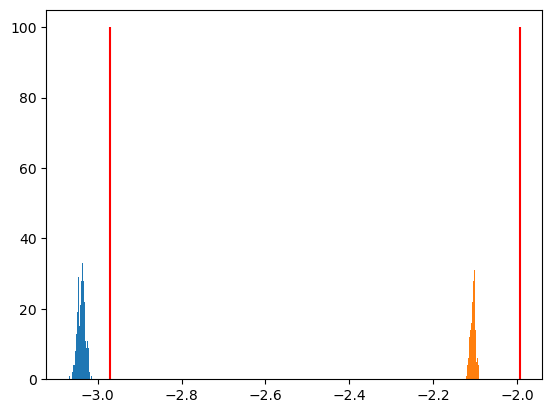

In [14]:
plt.hist(p[2,:,1], bins=100)
plt.hist(p[2,:,0], bins=100)
plt.vlines(val_data[2,1], 0, 100, color='red')
plt.vlines(val_data[2,0], 0, 100, color='red')
plt.show()

In [4]:
mask = torch.zeros_like(val_data[0])
mask[6:] = 1

In [ ]:
p = model.sample(val_data[:1000], condition_mask=mask.repeat(1000,1), device="cuda:1").to("cpu")

100%|██████████| 1000/1000 [04:13<00:00,  3.94it/s]


In [29]:
torch.tensor([1,2,3]).multinomial(1)

RuntimeError: multinomial only supports floating-point dtypes for input, got: Long

In [13]:
torch.mean(100*torch.abs((val_data[:1000]-p.mean(axis=1))/val_data[:1000]), axis=0)[:6]

tensor([  3.8102,   4.0290, 294.3724,  15.3292,  18.1108,  32.4858])

In [24]:
p.mean(axis=1).shape

torch.Size([1000, 14])

In [26]:
p.mean(axis=1)[:,:6]

tensor([[-2.6637, -2.8023, -0.2915,  0.5806,  0.5314,  7.5150],
        [-2.1139, -2.8658, -0.2710,  0.5616,  0.5103,  9.6454],
        [-2.1077, -3.0442, -0.3620,  0.5666,  0.5188,  6.0581],
        ...,
        [-2.3177, -2.8256, -0.3497,  0.5750,  0.5283,  5.6773],
        [-2.0414, -2.7940, -0.2511,  0.5571,  0.5052, 10.2568],
        [-2.4953, -3.0417, -0.3981,  0.5700,  0.5309,  3.4036]])

In [18]:
val_data[:1000,:6]

tensor([[-2.7104, -2.8187,  0.0938,  0.5076,  0.4899,  4.5705],
        [-2.0697, -2.7872, -0.3723,  0.4962,  0.4666,  7.0081],
        [-1.9933, -2.9700, -0.6510,  0.7150,  0.5921,  8.1804],
        ...,
        [-2.2048, -2.6840, -0.1035,  0.3844,  0.5521,  2.4740],
        [-1.9363, -2.7056, -0.1936,  0.5923,  0.6127,  9.3704],
        [-2.5485, -3.0766, -0.6182,  0.5331,  0.6020,  4.3152]])